## D. Kinney DSC 550 Final Project 

### Part 1: Graph Analysis
*****************************

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import statsmodels.formula.api as smf

from pandas.plotting import scatter_matrix
from plotnine import *

pd.set_option('display.max_columns', None)

%matplotlib inline

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

#### Step 1: Load data into dataframe

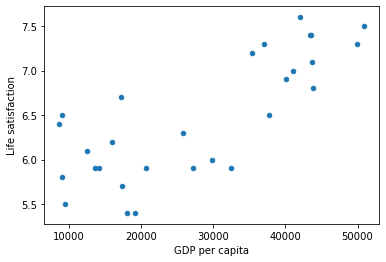

[[6.25984414]]


In [4]:
# Load the data
oecd_bli = pd.read_csv("data/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("data/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

#### Step 2:  check the dimension of the table

In [5]:
print("The dimension of the table is: ", oecd_bli.shape)

The dimension of the table is:  (2368, 17)


#### Step 3:  Look at the data

In [6]:
print(oecd_bli.head(5))

  LOCATION         Country INDICATOR                 Indicator MEASURE  \
0      AUS       Australia   JE_LMIS  Labour market insecurity       L   
1      AUT         Austria   JE_LMIS  Labour market insecurity       L   
2      BEL         Belgium   JE_LMIS  Labour market insecurity       L   
3      CAN          Canada   JE_LMIS  Labour market insecurity       L   
4      CZE  Czech Republic   JE_LMIS  Labour market insecurity       L   

  Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0   Value        TOT      Total        PC  Percentage               0   
1   Value        TOT      Total        PC  Percentage               0   
2   Value        TOT      Total        PC  Percentage               0   
3   Value        TOT      Total        PC  Percentage               0   
4   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Value  Flag Codes  Flags  
0     Units                    NaN 

In [7]:
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 17 columns):
LOCATION                 2368 non-null object
Country                  2368 non-null object
INDICATOR                2368 non-null object
Indicator                2368 non-null object
MEASURE                  2368 non-null object
Measure                  2368 non-null object
INEQUALITY               2368 non-null object
Inequality               2368 non-null object
Unit Code                2368 non-null object
Unit                     2368 non-null object
PowerCode Code           2368 non-null int64
PowerCode                2368 non-null object
Reference Period Code    0 non-null float64
Reference Period         0 non-null float64
Value                    2368 non-null float64
Flag Codes               0 non-null float64
Flags                    0 non-null float64
dtypes: float64(5), int64(1), object(11)
memory usage: 314.6+ KB


**Looking at the results of the "info" method, there are a number of empty columns that can be removed.** There are also some with the same value throughout.

In [8]:
# Remove empty columns
oecd_bli.dropna(axis=1, inplace=True)

# Looks liks some other variables have the same value from top to bottom,
# so really don't need them...
print(oecd_bli['MEASURE'].value_counts())
print(oecd_bli['PowerCode Code'].value_counts())
oecd_bli.drop(['MEASURE', 'Measure', 'PowerCode Code'], axis = 1, inplace=True)

# Remove space from Unit Code
oecd_bli.rename(columns={'Unit Code': 'UnitCode'})

print(oecd_bli.info())

L    2368
Name: MEASURE, dtype: int64
0    2368
Name: PowerCode Code, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 10 columns):
LOCATION      2368 non-null object
Country       2368 non-null object
INDICATOR     2368 non-null object
Indicator     2368 non-null object
INEQUALITY    2368 non-null object
Inequality    2368 non-null object
Unit Code     2368 non-null object
Unit          2368 non-null object
PowerCode     2368 non-null object
Value         2368 non-null float64
dtypes: float64(1), object(9)
memory usage: 185.1+ KB
None


In [9]:
oecd_bli.sample(10)

,LOCATION,Country,INDICATOR,Indicator,INEQUALITY,Inequality,Unit Code,Unit,PowerCode,Value
1948,GBR,United Kingdom,SW_LIFS,Life satisfaction,HGH,High,AVSCORE,Average score,Units,7.1
1916,CHE,Switzerland,SW_LIFS,Life satisfaction,WMN,Women,AVSCORE,Average score,Units,7.5
1591,LVA,Latvia,HS_LEB,Life expectancy,MN,Men,YR,Years,Units,69.8
1061,CZE,Czech Republic,ES_STCS,Student skills,MN,Men,AVSCORE,Average score,Units,489.0
2086,SVN,Slovenia,PS_REPH,Homicide rate,WMN,Women,RATIO,Ratio,Units,0.7
547,CHE,Switzerland,JE_EMPL,Employment rate,MN,Men,PC,Percentage,Units,84.0
1316,CHL,Chile,ES_EDUEX,Years in education,WMN,Women,YR,Years,Units,17.7
192,BRA,Brazil,CG_SENG,Stakeholder engagement for developing regulations,TOT,Total,AVSCORE,Average score,Units,2.2
1795,LUX,Luxembourg,HS_SFRH,Self-reported health,LW,Low,PC,Percentage,Units,65.0
1939,ISL,Iceland,SW_LIFS,Life satisfaction,HGH,High,AVSCORE,Average score,Units,8.0


#### Using **pandas.pivot_table**, transform dataframe into a more human-friendly format...

In [10]:
df_table = pd.pivot_table(oecd_bli, values='Value', index='Country', columns=['INDICATOR'])

# I also need a 'Country' column. I know this is probably not the right way to go about this...
df_table['country'] = df_table.index.astype('str')

# Drop this row, it's not a country...
indexNames = df_table[df_table['country'] == 'OECD - Total'].index
df_table.drop(indexNames , inplace=True)

print(df_table.sample(5))

# For reference, create a dictionary of Indicators
print("LIST OF INDICATOR KEYS AND DESCRIPTIONS")
print("=======================================")
df_indicators = oecd_bli.groupby('INDICATOR')['Indicator'].agg('min')
print(df_indicators.sort_values())

INDICATOR        CG_SENG  CG_VOTO  EQ_AIRP   EQ_WATER    ES_EDUA   ES_EDUEX  \
Country                                                                       
Australia            2.7     91.0      5.0  92.666667  81.000000  20.966667   
New Zealand          2.5     80.0      5.0  89.000000  78.666667  17.700000   
Slovak Republic      3.0     60.0     21.0  84.666667  91.333333  15.766667   
Spain                1.8     70.0     11.0  72.333333  59.000000  17.900000   
Turkey               1.5     86.0     20.0  65.000000  39.000000  18.300000   

INDICATOR        ES_STCS  HO_BASE  HO_HISH  HO_NUMR     HS_LEB  HS_SFRH  \
Country                                                                   
Australia          411.2      NaN     20.0      NaN  82.500000    87.25   
New Zealand        506.2      NaN     26.0      2.4  81.700000    89.25   
Slovak Republic    463.4      1.2     23.0      1.1  77.266667    68.60   
Spain              492.4      0.1     21.0      1.9  83.400000    74.00

In [11]:
print("Describe Data")
print(df_table.describe())

Describe Data
INDICATOR    CG_SENG   CG_VOTO    EQ_AIRP   EQ_WATER    ES_EDUA   ES_EDUEX  \
count      38.000000  40.00000  40.000000  40.000000  39.000000  39.000000   
mean        2.160526  69.57500  13.325000  82.333333  77.717949  17.547863   
std         0.577291  12.21157   5.770782  10.492977  15.136134   1.412720   
min         1.200000  47.00000   3.000000  55.333333  37.666667  14.100000   
25%         1.725000  60.75000   9.750000  74.250000  75.000000  16.550000   
50%         2.200000  69.50000  14.000000  83.833333  82.000000  17.666667   
75%         2.575000  79.00000  16.500000  91.083333  87.833333  18.350000   
max         3.200000  91.00000  28.000000  98.666667  94.000000  20.966667   

INDICATOR     ES_STCS    HO_BASE    HO_HISH    HO_NUMR     HS_LEB    HS_SFRH  \
count       39.000000  37.000000  38.000000  37.000000  40.000000  37.000000   
mean       485.707692   5.075676  20.657895   1.632432  79.567500  67.493243   
std         33.787972   8.448320   2.528500

In [12]:
corr_matrix = df_table.corr()
corr_matrix["SW_LIFS"].sort_values(ascending=False)

INDICATOR
SW_LIFS      1.000000
JE_PEARN     0.731418
IW_HADI      0.713008
EQ_WATER     0.682587
JE_EMPL      0.678344
SC_SNTWS     0.667896
HS_SFRH      0.656817
PS_FSAFEN    0.600163
HO_NUMR      0.597502
HS_LEB       0.568044
CG_VOTO      0.368598
ES_EDUEX     0.324655
ES_EDUA      0.293395
IW_HNFW      0.292887
HO_HISH      0.286334
WL_TNOW      0.199424
ES_STCS      0.197223
CG_SENG      0.180861
WL_EWLH     -0.195136
PS_REPH     -0.259378
JE_LMIS     -0.452874
HO_BASE     -0.528167
EQ_AIRP     -0.551376
JE_LTUR     -0.567002
Name: SW_LIFS, dtype: float64

#### Step 4: Think about some questions that might help you predict what indicators most influence the Life Satisfaction score:

The central point of this dataset is the so-called, **"Life Satisfaction Index"**. In other words, do indicators in the categories of housing, income, jobs, community, education, environment, civic engagement, health, etc. really lead to a better, more satisfied life? Let's focus on a few high-level categories to see how the indicators correlate with the LSI...

* **Wealth** Net Wealth, Labor Market Insecurity, Employment rate
* **Environment** Air pollution, Homicide rate, Water quality
* **Health** Life expectancy, Self-reported health, Long work hours

My observations are based on the **graph analysis** below.

First, there does not seem to be any noticeable normal distribution amongst any of the indicators, although some--such as HS_LEB (Life Expectancy) exhibit *normal-ish* distribution on a skewed scale.

* **Wealth** - somewhat surprisingly, Net Wealth does not appear to be as important as labor market security and the employment rate. Having said that, removing the data points above $500,000 might tell a different story.
* **Environment** - Air and water quality seem to factor higher than the homicide rate, which shows almost no effect on the LSI.
* **Health** - Life expectancy seems like an obvious factor, but I was also satisfied to see long work hours affect the index as well.

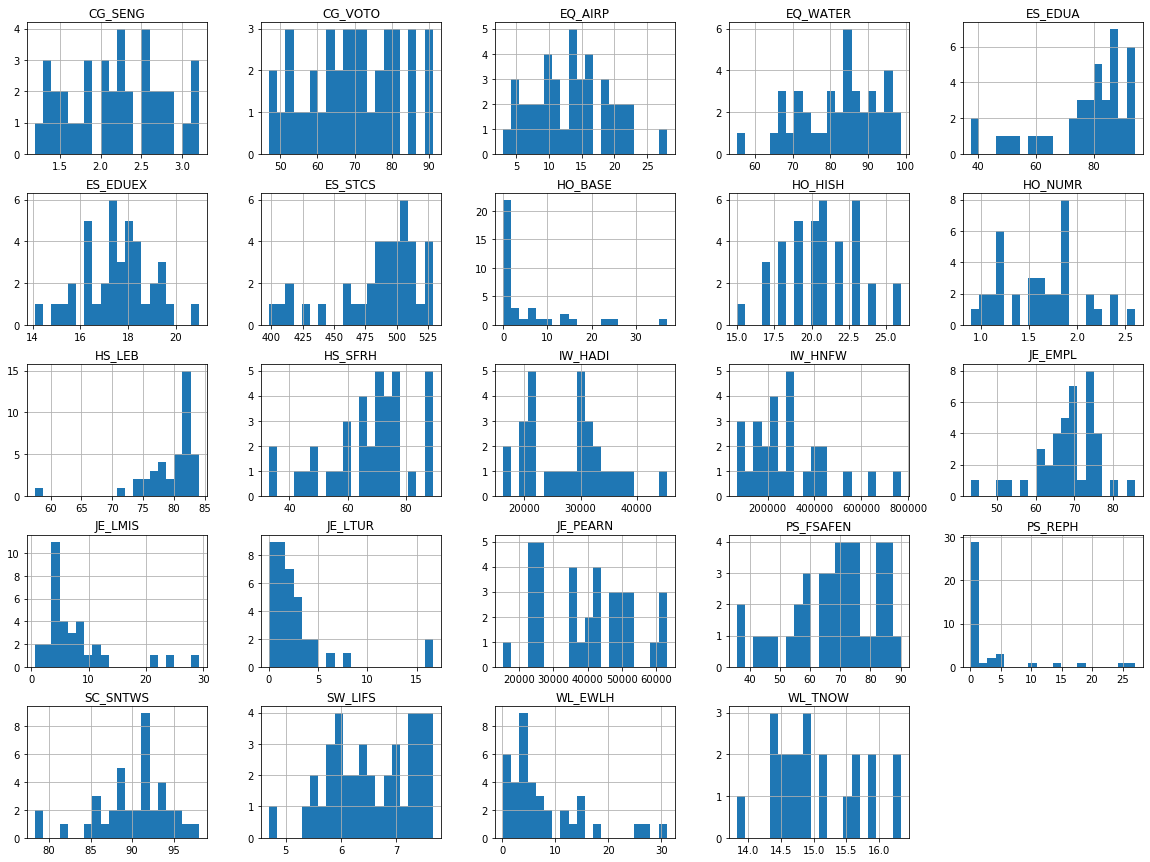

In [13]:
df_table.hist( bins = 20, figsize =( 20,15)) 
plt.show()

In [14]:
results = smf.ols('SW_LIFS ~ IW_HNFW + JE_LMIS + JE_EMPL', data=df_table).fit()
print("Money: Net Wealth, Labor Market Insecurity, Employment rate")
print(results.summary())

Money: Net Wealth, Labor Market Insecurity, Employment rate
                            OLS Regression Results                            
Dep. Variable:                SW_LIFS   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     3.564
Date:                Sun, 26 Jan 2020   Prob (F-statistic):             0.0306
Time:                        09:45:22   Log-Likelihood:                -22.710
No. Observations:                  26   AIC:                             53.42
Df Residuals:                      22   BIC:                             58.45
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A6B1179A0>,
      dtype=object)

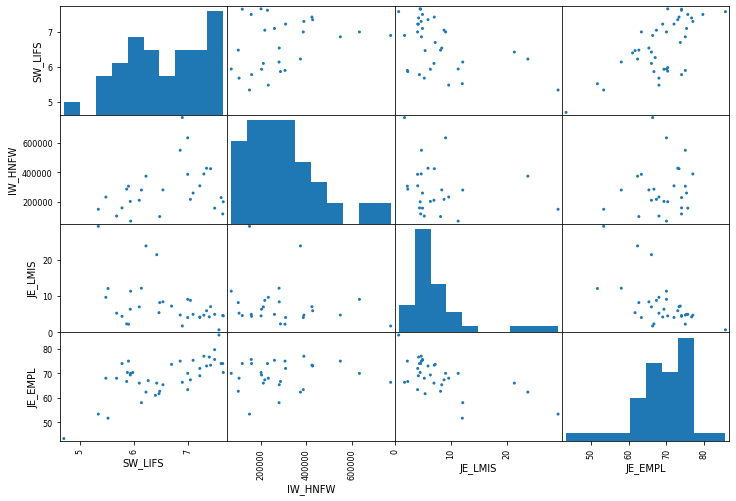

In [15]:
attributes = ['SW_LIFS', 'IW_HNFW', 'JE_LMIS', 'JE_EMPL']
scatter_matrix(df_table[attributes], alpha=1.0, figsize=(12, 8))

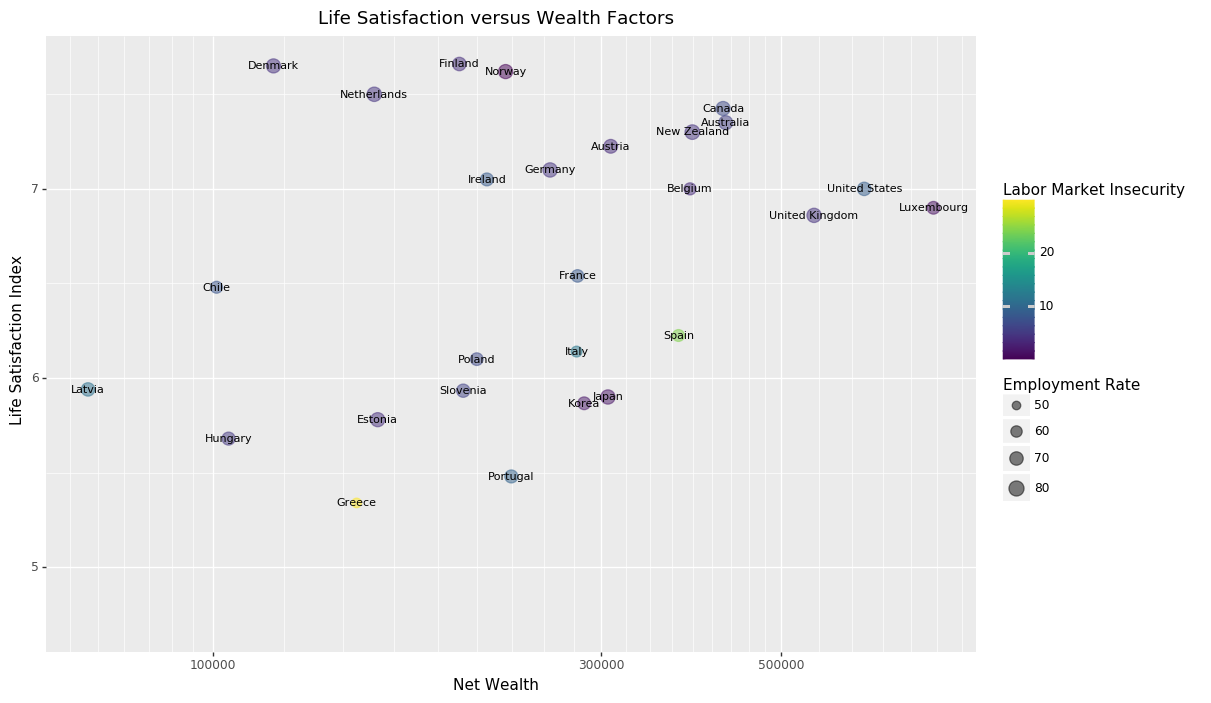

<ggplot: (174595026035)>

In [16]:
(ggplot(df_table, aes(x='IW_HNFW', y='SW_LIFS', color='JE_LMIS', size='JE_EMPL')) +
        geom_point(alpha=0.5) +
        scale_x_log10() +
        geom_text(aes(x='IW_HNFW', y='SW_LIFS', label='country'),
                  color="black",
                  size=8,
                  data=df_table) +
         theme(figure_size = (12.0, 8.0)) +
        labs(title="Life Satisfaction versus Wealth Factors",x="Net Wealth",y="Life Satisfaction Index",size="Employment Rate",color="Labor Market Insecurity")
)

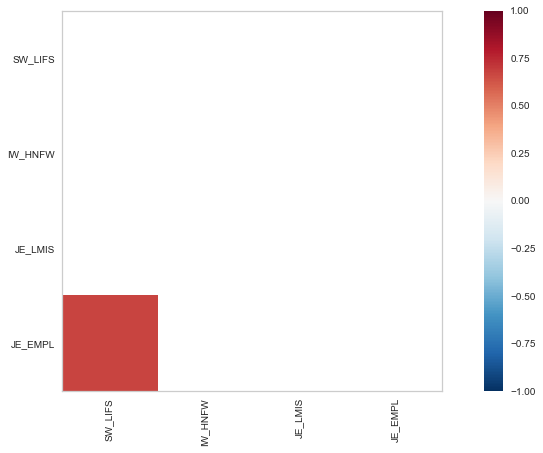

In [17]:
import yellowbrick
from yellowbrick.features import Rank2D
from yellowbrick.features import ParallelCoordinates
from yellowbrick.style import set_palette

#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)
num_features = ['SW_LIFS', 'IW_HNFW', 'JE_LMIS', 'JE_EMPL']
# extract the numpy arrays from the data frame
X = df_table[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data

plt.show()

In [18]:
results = smf.ols('SW_LIFS ~ EQ_AIRP + PS_REPH + EQ_WATER', data=df_table).fit()
print("Environment: Air pollution, Homicide rate, Water quality")
print(results.summary())

Environment: Air pollution, Homicide rate, Water quality
                            OLS Regression Results                            
Dep. Variable:                SW_LIFS   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     12.57
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           8.92e-06
Time:                        09:45:24   Log-Likelihood:                -31.080
No. Observations:                  40   AIC:                             70.16
Df Residuals:                      36   BIC:                             76.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A6A85F520>,
      dtype=object)

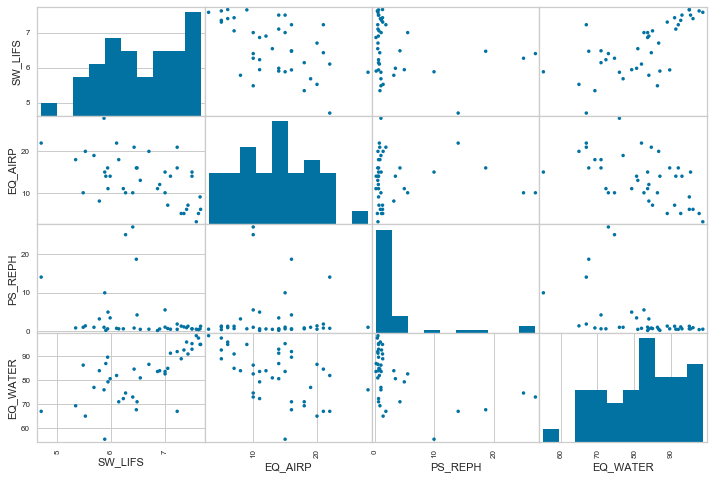

In [19]:
attributes = ['SW_LIFS', 'EQ_AIRP', 'PS_REPH', 'EQ_WATER']
scatter_matrix(df_table[attributes], alpha=1.0, figsize=(12, 8))

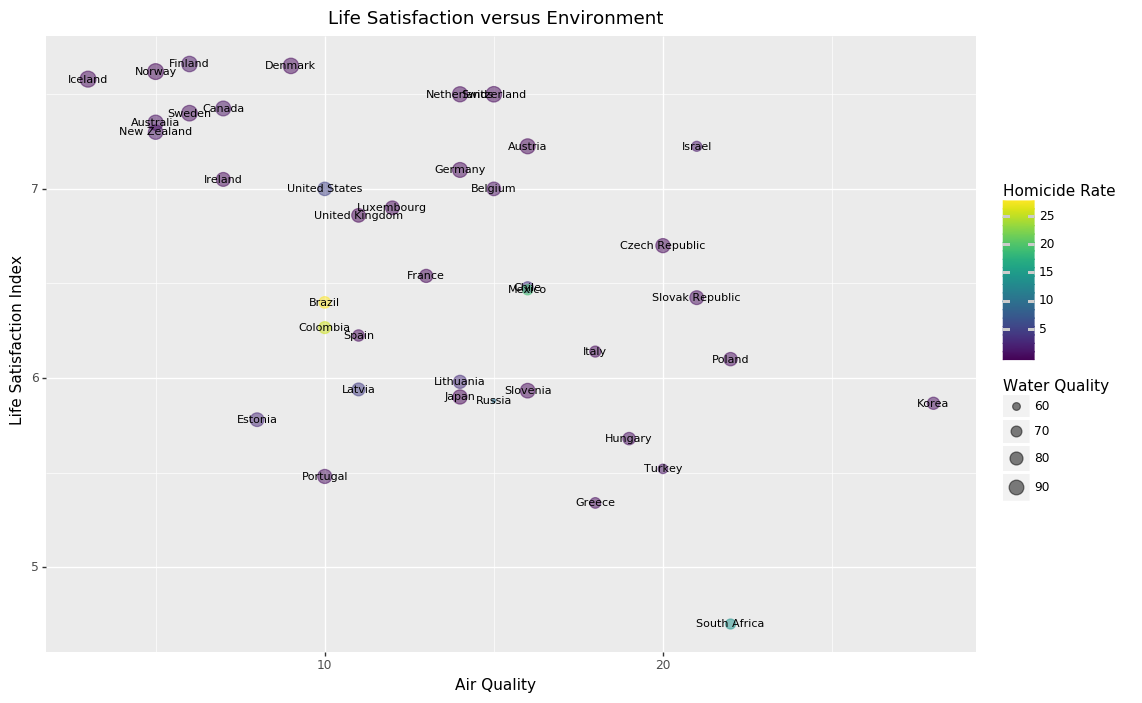

<ggplot: (174595291127)>

In [20]:
(ggplot(df_table, aes(x='EQ_AIRP', y='SW_LIFS', color='PS_REPH', size='EQ_WATER')) +
        geom_point(alpha = 0.5) +
         geom_text(aes(x='EQ_AIRP', y='SW_LIFS', label='country'),
                  color="black",
                  size=8,
                  data=df_table) +
        theme(figure_size = (12.0, 8.0)) +
        labs(title="Life Satisfaction versus Environment",x="Air Quality",y="Life Satisfaction Index",size="Water Quality",color="Homicide Rate")
)

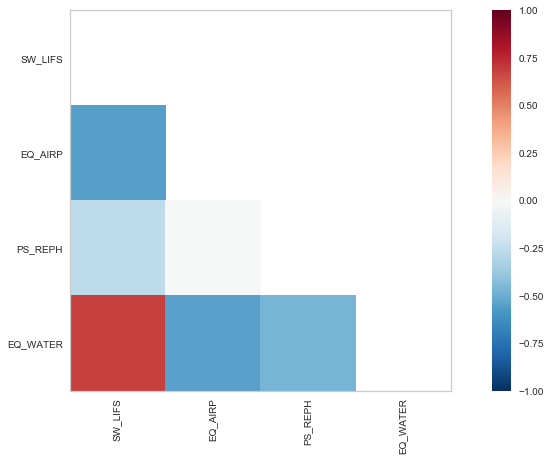

In [21]:
#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)
num_features = ['SW_LIFS', 'EQ_AIRP', 'PS_REPH', 'EQ_WATER']
# extract the numpy arrays from the data frame
X = df_table[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data

plt.show()

In [22]:
results = smf.ols('SW_LIFS ~ HS_LEB + HS_SFRH + WL_EWLH', data=df_table).fit()
print("Health: Life expectancy, Self-reported health, Long work hours")
print(results.summary())

Health: Life expectancy, Self-reported health, Long work hours
                            OLS Regression Results                            
Dep. Variable:                SW_LIFS   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     9.707
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           0.000114
Time:                        09:45:26   Log-Likelihood:                -26.111
No. Observations:                  35   AIC:                             60.22
Df Residuals:                      31   BIC:                             66.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A6A70AA30>,
      dtype=object)

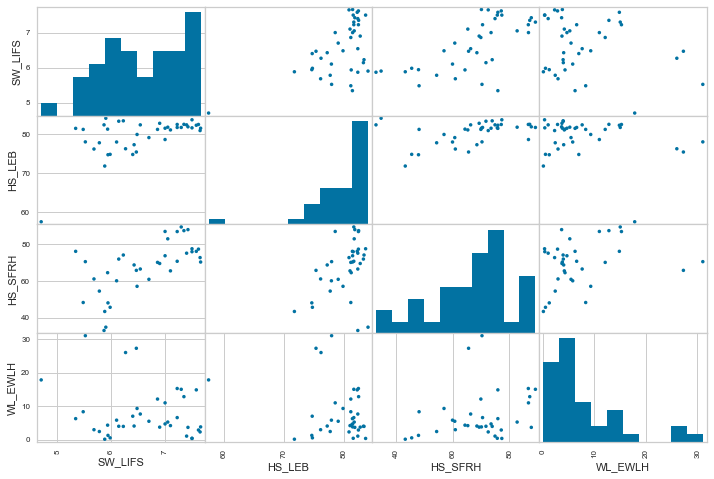

In [23]:
attributes = ['SW_LIFS', 'HS_LEB', 'HS_SFRH', 'WL_EWLH']
scatter_matrix(df_table[attributes], alpha=1.0, figsize=(12, 8))

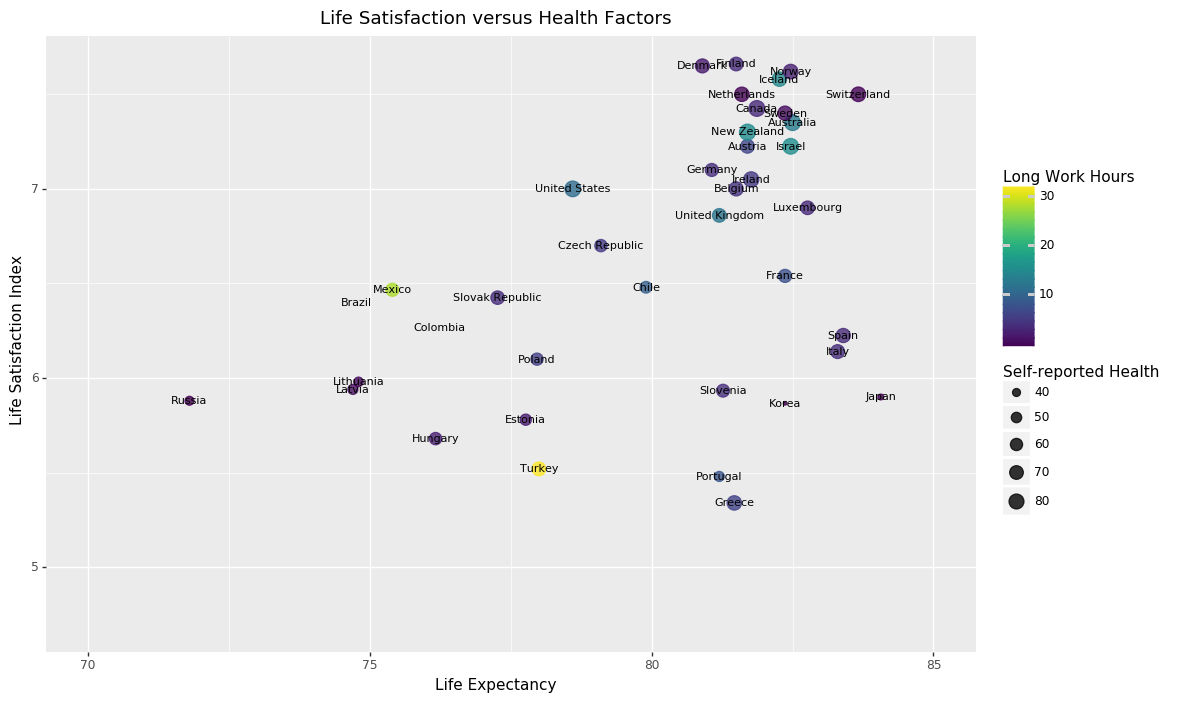

<ggplot: (174594488278)>

In [24]:
(ggplot(df_table[df_table['HS_LEB'] > 70], aes(x='HS_LEB', y='SW_LIFS', color='WL_EWLH', size='HS_SFRH')) +
        geom_point(alpha = 0.8) +
        scale_x_continuous(limits=[70,85]) +
        geom_text(aes(x='HS_LEB', y='SW_LIFS', label='country'),
                  color="black",
                  size=8,
                  data=df_table) +
        theme(figure_size = (12.0, 8.0)) +
        labs(title="Life Satisfaction versus Health Factors",x="Life Expectancy",y="Life Satisfaction Index",size="Self-reported Health",color="Long Work Hours")
)


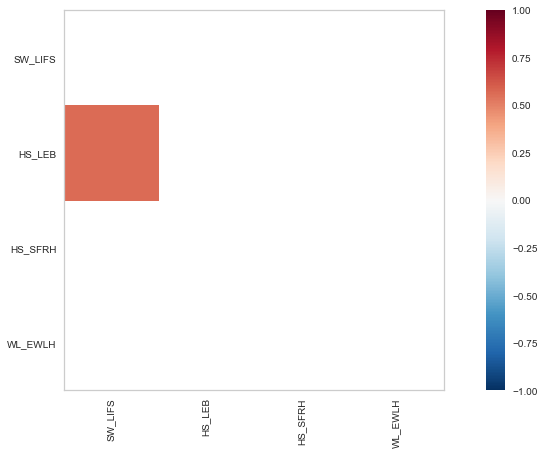

In [25]:
#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)
num_features = ['SW_LIFS', 'HS_LEB', 'HS_SFRH', 'WL_EWLH']
# extract the numpy arrays from the data frame
X = df_table[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data

plt.show()

*************************************************
#### Part 2: Dimensionality and Feature Reduction
*************************************************

In [26]:
# What kind of data are we dealing with?
df_table.describe()

INDICATOR,CG_SENG,CG_VOTO,EQ_AIRP,EQ_WATER,ES_EDUA,ES_EDUEX,ES_STCS,HO_BASE,HO_HISH,HO_NUMR,HS_LEB,HS_SFRH,IW_HADI,IW_HNFW,JE_EMPL,JE_LMIS,JE_LTUR,JE_PEARN,PS_FSAFEN,PS_REPH,SC_SNTWS,SW_LIFS,WL_EWLH,WL_TNOW
count,38.000000,40.00000,40.000000,40.000000,39.000000,39.000000,39.000000,37.000000,38.000000,37.000000,40.000000,37.000000,29.000000,27.000000,40.000000,33.000000,38.000000,35.000000,40.000000,40.000000,40.000000,40.000000,38.000000,22.000000
mean,2.160526,69.57500,13.325000,82.333333,77.717949,17.547863,485.707692,5.075676,20.657895,1.632432,79.567500,67.493243,27807.310345,289780.185185,68.533333,7.706970,2.855789,39817.514286,68.463333,3.481667,90.193333,6.577208,7.789649,15.048939
std,0.577291,12.21157,5.770782,10.492977,15.136134,1.412720,33.787972,8.448320,2.528500,0.431441,4.669642,14.331584,7055.262661,165673.432787,7.882253,6.234572,3.622899,13108.329748,13.960934,6.459861,4.384954,0.762724,7.585983,0.672978
min,1.200000,47.00000,3.000000,55.333333,37.666667,14.100000,398.200000,0.000000,15.000000,0.900000,57.500000,33.000000,16275.000000,70160.000000,43.333333,0.662000,0.050000,15314.000000,35.866667,0.166667,78.333333,4.700000,0.140000,13.826667
25%,1.725000,60.75000,9.750000,74.250000,75.000000,16.550000,475.800000,0.300000,19.000000,1.200000,77.916667,60.800000,21453.000000,180100.000000,65.833333,4.392000,1.011667,25971.500000,60.108333,0.600000,88.300000,5.938333,3.150833,14.560833
50%,2.200000,69.50000,14.000000,83.833333,82.000000,17.666667,492.800000,0.900000,21.000000,1.600000,81.366667,70.200000,29333.000000,259667.000000,69.666667,5.396000,1.776667,40863.000000,70.483333,0.950000,91.350000,6.510000,4.981667,14.885000
75%,2.575000,79.00000,16.500000,91.083333,87.833333,18.350000,506.800000,6.700000,22.750000,1.900000,82.366667,76.000000,31304.000000,379777.000000,74.000000,8.784000,3.196667,49400.500000,78.500000,2.166667,93.062500,7.243750,10.571667,15.600833
max,3.200000,91.00000,28.000000,98.666667,94.000000,20.966667,528.800000,37.000000,26.000000,2.600000,84.066667,89.250000,45284.000000,769053.000000,85.666667,29.200000,16.643333,63062.000000,90.033333,27.000000,98.000000,7.660000,31.043333,16.336667


**Proposed Steps for Dimensionality and Feature Reduction**  

* Due to the quantitative nature of these variables, there exists wide discrepancies of units. For instance, Household Net Wealth can be in the thousands of US dollars, while Employment Rate is a percentage. I will apply a simple `min-max rescaler` to normalize all variables.
* The *variance* between features varies greatly, For example, CG_SENS ranges from 1.2 to 3.2 while SC_SNTWS ranges from 4.38 to 98. I will start by setting a variance threshold and eliminating features below the threshold. In theory, this should eliminate variables with low variance, which likely will not contribute greatly to the model.
* I suspect that variables such as air pollution and water quality probably are highly correlated. I will apply a correlation matrix and will consider dropping one of the correlated features.
* That takes care of the easy stuff. Next I'd like to automatically select the best features to keep by leveraging scikit-learn's recursive feature elimination functionality.

[VarianceThreshold](https://stackoverflow.com/questions/29298973/removing-features-with-low-variance-using-scikit-learn/29301500)

In [27]:
from sklearn import preprocessing

# Make a features dataset by dropping the target variable--SW_LIFS
features = df_table.drop(['country','SW_LIFS'], axis=1)
target = df_table['SW_LIFS']

# Standardizing
std_scale = preprocessing.StandardScaler().fit(features)
df_std = std_scale.transform(features)

#Min-max scaling
minmax_scale = preprocessing.MinMaxScaler().fit(features)
df_minmax = minmax_scale.transform(features)

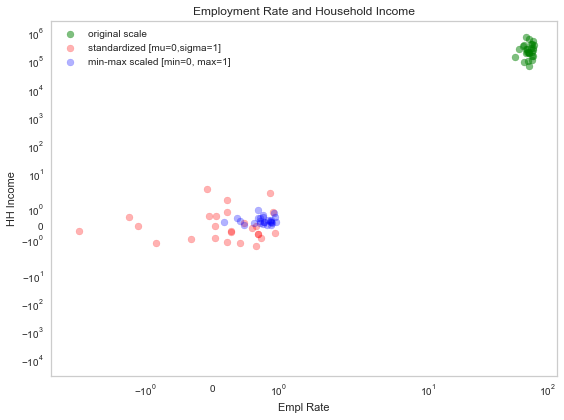

In [28]:
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df_table['JE_EMPL'], df_table['IW_HNFW'],
            color='green', label='original scale', alpha=0.5)

    plt.scatter(df_std[:,4], df_std[:,13], color='red',
            label='standardized [mu=0,sigma=1]', alpha=0.3)

    plt.scatter(df_minmax[:,4], df_minmax[:,13],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Employment Rate and Household Income')
    plt.xlabel('Empl Rate')
    plt.ylabel('HH Income')
    plt.legend(loc='upper left')
    plt.xscale('symlog')
    plt.yscale('symlog')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

In [29]:
from sklearn.feature_selection import VarianceThreshold

# Make a features dataset by dropping the target variable--SW_LIFS
features = df_table.drop(['country','SW_LIFS'], axis=1)
target = df_table['SW_LIFS']

# Create thresholder
thresholder = VarianceThreshold(threshold=5.0)

# Create high variance feature matrix
features_high_variance = thresholder.fit_transform(features)

# View high variance feature matrix
features_high_variance[0:3]

# View variances
thresholder.fit(features).variances_

array([3.24494460e-01, 1.45394375e+02, 3.24693750e+01, 1.07350000e+02,
       2.23228139e+02, 1.94460370e+00, 1.11235456e+03, 6.94450840e+01,
       6.22506925e+00, 1.81110299e-01, 2.12604160e+01, 1.99843100e+02,
       4.80602922e+07, 2.64311054e+10, 6.05766667e+01, 3.76920085e+01,
       1.27799922e+01, 1.66918929e+08, 1.90034989e+02, 4.06865528e+01,
       1.87471222e+01, 5.60327426e+01, 4.32312511e-01])

In [30]:
# Create correlation matrix
corr_matrix = features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                          k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
features.drop(features.columns[to_drop], axis=1).head()

INDICATOR,CG_SENG,CG_VOTO,EQ_AIRP,EQ_WATER,ES_EDUA,ES_EDUEX,ES_STCS,HO_BASE,HO_HISH,HO_NUMR,HS_LEB,HS_SFRH,IW_HADI,IW_HNFW,JE_EMPL,JE_LMIS,JE_LTUR,JE_PEARN,PS_FSAFEN,PS_REPH,SC_SNTWS,WL_EWLH,WL_TNOW
Country,,,,,,,,,,,,,,,,,,,,,,,
Australia,2.7,91.0,5.0,92.666667,81.000000,20.966667,411.2,NaN,20.0,NaN,82.500000,87.25,32759.0,427064.0,73.000000,5.922,1.306667,49126.0,64.133333,1.100000,95.25,12.840000,14.350000
Austria,1.3,80.0,16.0,92.000000,85.000000,17.000000,492.8,0.9,21.0,1.6,81.700000,70.60,33541.0,308325.0,72.000000,4.076,1.830000,50349.0,80.700000,0.466667,92.00,6.590000,14.530000
Belgium,2.0,89.0,15.0,83.666667,77.000000,19.300000,503.8,1.9,21.0,2.2,81.500000,73.60,30364.0,386006.0,63.333333,4.052,3.533333,49675.0,70.266667,1.033333,92.00,4.703333,15.663333
Brazil,2.2,79.0,10.0,73.000000,49.000000,16.166667,398.2,6.7,NaN,NaN,74.766667,NaN,NaN,NaN,61.000000,NaN,NaN,NaN,35.866667,27.000000,89.25,7.006667,NaN
Canada,2.9,68.0,7.0,91.000000,91.333333,17.333333,523.2,0.2,22.0,2.6,81.866667,87.80,30854.0,423849.0,73.333333,7.048,0.763333,47622.0,82.500000,1.266667,93.25,3.673333,14.553333


INDICATOR   CG_SENG   CG_VOTO   EQ_AIRP  EQ_WATER   ES_EDUA  ES_EDUEX  \
INDICATOR                                                               
CG_SENG    1.000000  0.028002  0.015333  0.052708  0.245220  0.037028   
CG_VOTO    0.028002  1.000000  0.205751  0.161888  0.086394  0.301847   
EQ_AIRP    0.015333  0.205751  1.000000  0.545403  0.012111  0.341326   
EQ_WATER   0.052708  0.161888  0.545403  1.000000  0.401520  0.499011   
ES_EDUA    0.245220  0.086394  0.012111  0.401520  1.000000  0.272450   
ES_EDUEX   0.037028  0.301847  0.341326  0.499011  0.272450  1.000000   
ES_STCS    0.067136  0.057214  0.072012  0.473621  0.627987  0.248241   
HO_BASE    0.002465  0.231873  0.229820  0.586296  0.327014  0.500586   
HO_HISH    0.070164  0.046796  0.204556  0.259928  0.052753  0.146336   
HO_NUMR    0.132029  0.297270  0.599746  0.632610  0.238163  0.323064   
HS_LEB     0.086465  0.147134  0.287432  0.502301  0.086281  0.314825   
HS_SFRH    0.186154  0.422847  0.416346  0.295603  

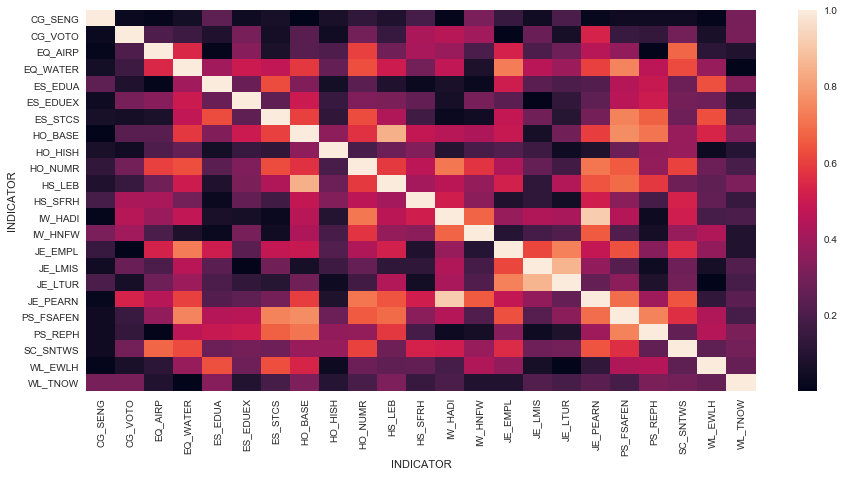

In [31]:
import seaborn as sns
print(corr_matrix)
sns.heatmap(corr_matrix)

In [32]:
# Load libraries
import warnings
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import linear_model

# Suppress an annoying but harmless warning
warnings.filterwarnings(action="ignore", module="scipy",
                        message="^internal gelsd")

# Generate features matrix, target vector, and the true coefficients
features, target = make_regression(n_samples = 10000,
                                   n_features = 100,
                                   n_informative = 2,
                                   random_state = 1)

# Create a linear regression
ols = linear_model.LinearRegression()

# Recursively eliminate features
rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error")
rfecv.fit(features, target)
rfecv.transform(features)

# Once we have conducted RFE, we can see the number of features we should keep: 
# Number of best features
print("Number of features we should keep: {}".format(rfecv.n_features_))

# We can also see which of those features we should keep: 
# Which categories are best
print(rfecv.support_)

# Rank features best (1) to worst
print(rfecv.ranking_)

Number of features we should keep: 9
[False  True False False False  True False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False  True False
 False False False  True False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False False  True False False False False False
 False False False False]
[43  1 52 40 25  1 30 12 72  5 75 24 55 45 39 73 47 36  1 38 74 87 21 17
 13 56 11  4  3 33  9 59 22 29  1 63 34 41 84  1 10 26 28 71 78 42 91  1
 88 92 85 54 80 81 31 86 48  7 20 62 83 50  6 37 60 65 57 76 46 49 44  2
 15 66 16 35 90 82 77 69 64 32 18 51 23 67  1  1  8 53  1 89 68 58 79 61
 27 70 14 19]


**************
**References**

http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#standardization-and-min-max-scaling
Albon, Chris. Machine Learning with Python Cookbook: Practical Solutions from Preprocessing to Deep Learning . O'Reilly Media. Kindle Edition. 
